In [233]:
import os
import pandas as pd

In [234]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,47,48,50,50,50,53,59,70,75,NaN
1,NaN,Japan,2,1,2,2,4,4,7,7,...,360,420,461,502,511,581,639,639,701,NaN
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,117,130,138,150,150,160,178,178,200,NaN
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,NaN
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,50,83,93,99,117,129,149,149,197,NaN
5,British Columbia,Canada,0,0,0,0,0,0,1,1,...,13,21,21,27,32,32,39,46,64,NaN
6,New South Wales,Australia,0,0,0,0,3,4,4,4,...,22,26,28,38,48,55,65,65,92,NaN
7,Victoria,Australia,0,0,0,0,1,1,1,1,...,10,10,11,11,15,18,21,21,36,NaN
8,Queensland,Australia,0,0,0,0,0,0,0,1,...,13,13,13,15,15,18,20,20,35,NaN
9,NaN,Cambodia,0,0,0,0,0,1,1,1,...,1,1,1,2,2,2,3,3,5,NaN


In [246]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada'])) | (df[last_date]>1000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df

Confirmed                                                   \
Country/Region    Canada  China France Germany   Iran  Italy Korea, South   
date                                                                        
2020-01-22             0    548      0       0      0      0            1   
2020-01-23             0    643      0       0      0      0            1   
2020-01-24             0    920      2       0      0      0            2   
2020-01-25             0   1406      3       0      0      0            2   
2020-01-26             1   2075      3       0      0      0            3   
2020-01-27             1   2877      3       1      0      0            4   
2020-01-28             2   5509      4       4      0      0            4   
2020-01-29             2   6087      5       4      0      0            4   
2020-01-30             2   8141      5       4      0      0            4   
2020-01-31             4   9802      5       5      0      2           11   
2020-02-01             4  11891      6       8      0      2           12   
2020-02-02             4  16630      6      10      0      2           15   
2020-02-03             4  19716      6      12      0      2           15   
2020-02-04             4  23707      6      12      0      2           16   
2020-02-05             5  27440      6      12      0      2           19   
2020-02-06             5  30587      6      12      0      2           23   
2020-02-07             7  34110      6      13      0      3           24   
2020-02-08             7  36814     11      13      0      3           24   
2020-02-09             7  39829     11      14      0      3           25   
2020-02-10             7  42354     11      14      0      3           27   
2020-02-11             7  44386     11      16      0      3           28   
2020-02-12             7  44759     11      16      0      3           28   
2020-02-13             7  59895     11      16      0      3           28   
2020-02-14             7  66358     11      16      0      3           28   
2020-02-15             7  68413     12      16      0      3           28   
2020-02-16             7  70513     12      16      0      3           29   
2020-02-17             8  72434     12      16      0      3           30   
2020-02-18             8  74211     12      16      0      3           31   
2020-02-19             8  74619     12      16      2      3           31   
2020-02-20             8  75077     12      16      5      3          104   
2020-02-21             9  75550     12      16     18     20          204   
2020-02-22             9  77001     12      16     28     62          433   
2020-02-23             9  77022     12      16     43    155          602   
2020-02-24            10  77241     12      16     61    229          833   
2020-02-25            11  77754     14      17     95    322          977   
2020-02-26            11  78166     18      27    139    453         1261   
2020-02-27            13  78600     38      46    245    655         1766   
2020-02-28            14  78928     57      48    388    888         2337   
2020-02-29            20  79356    100      79    593   1128         3150   
2020-03-01            24  79932    130     130    978   1694         3736   
2020-03-02            27  80136    191     159   1501   2036         4335   
2020-03-03            30  80261    204     196   2336   2502         5186   
2020-03-04            33  80386    288     262   2922   3089         5621   
2020-03-05            37  80537    380     482   3513   3858         6088   
2020-03-06            49  80690    656     670   4747   4636         6593   
2020-03-07            54  80770    952     799   5823   5883         7041   
2020-03-08            64  80823   1129    1040   6566   7375         7314   
2020-03-09            77  80860   1212    1176   7161   9172         7478   
2020-03-10            79  80887   1787    1457   8042  10149         7513   
2020-03-11 

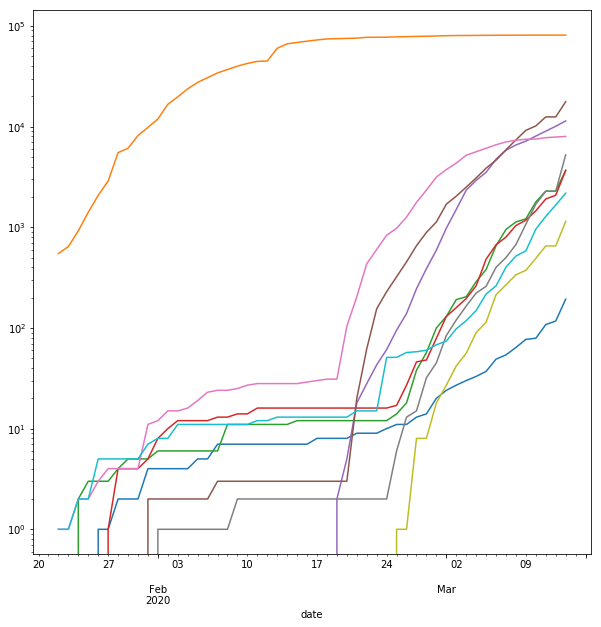

In [247]:



%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(logy=True, legend=False) #list(df.columns))


In [248]:
# Shift all the series
df.columns = [c[1] for c in df.columns]

#del df['Others']

#df['China']=df['China']+df['Mainland China']
#del df['Mainland China']


for c in df.columns:
    for i,a in enumerate(df[c]):        
        if i==0 and a>100:
            df[c]=df[c].shift(4) # hack to push out china
            break
        if a>=100:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
df

,Canada,China,France,Germany,Iran,Italy,"Korea, South",Spain,Switzerland,US
0,108.0,NaN,100.0,130.0,139.0,155.0,104.0,120.0,114.0,118.0
1,117.0,NaN,130.0,159.0,245.0,229.0,204.0,165.0,214.0,149.0
2,193.0,NaN,191.0,196.0,388.0,322.0,433.0,222.0,268.0,217.0
3,NaN,NaN,204.0,262.0,593.0,453.0,602.0,259.0,337.0,262.0
4,NaN,548.0,288.0,482.0,978.0,655.0,833.0,400.0,374.0,402.0
5,NaN,643.0,380.0,670.0,1501.0,888.0,977.0,500.0,491.0,518.0
6,NaN,920.0,656.0,799.0,2336.0,1128.0,1261.0,673.0,652.0,583.0
7,NaN,1406.0,952.0,1040.0,2922.0,1694.0,1766.0,1073.0,652.0,959.0
8,NaN,2075.0,1129.0,1176.0,3513.0,2036.0,2337.0,1695.0,1139.0,1281.0
9,NaN,2877.0,1212.0,1457.0,4747.0,2502.0,3150.0,2277.0,NaN,1663.0


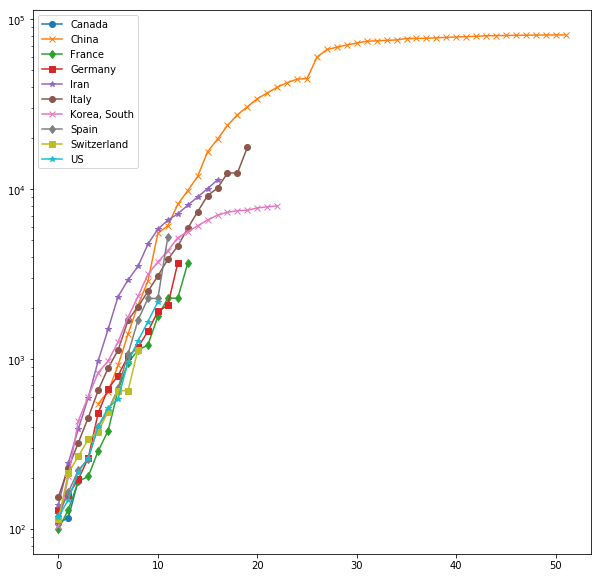

In [249]:
from math import ceil
fig, ax = plt.subplots()
markers = [item for sublist in ['oxds*']*ceil(len(df.columns)/4) for item in sublist]
#df.plot(logy=True, ax=ax) #, ax=ax)
for c,m in zip(df,markers):
    df[c].plot(logy=True, marker=m,  ax=ax)

ax.legend()


In [251]:
# US and Canada 
df=raw
# temporarily drop 03/14
del df[df.columns[-1]]
df = df[df['Country/Region'].isin(['Canada','US'])]

df=df.groupby('Country/Region').sum()


df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Canada,US
date,,
2020-01-22,0,1
2020-01-23,0,1
2020-01-24,0,2
2020-01-25,0,2
2020-01-26,1,5
2020-01-27,1,5
2020-01-28,2,5
2020-01-29,2,5
2020-01-30,2,5


In [283]:
#https://stackoverflow.com/questions/54376900/fit-sigmoid-curve-in-python

from scipy.optimize import curve_fit
import numpy as np
from scipy.optimize import differential_evolution
import warnings

yData = df['US']
xData = range(len(yData))

def sigmoid(x, amplitude, x0, k):
    return amplitude/(1.0+np.exp(-(x-k)/x0))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = sigmoid(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minY, maxY]) # search bounds for amplitude
    parameterBounds.append([1.0/maxX, 1e6]) # search bounds for x0
    parameterBounds.append([minX, maxX]) # search bounds for k

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x, np.array(parameterBounds).T

# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters, bounds = generate_Initial_Parameters()
print(geneticParameters)
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
popt, pcov = curve_fit(sigmoid, xData, yData, geneticParameters, bounds=[[0,0,0],[np.inf,np.inf,np.inf]])
sigma = np.sqrt(np.diag(pcov)) 
print('Fitted parameters: {} Cov: {} Sigma: {}'.format(popt, pcov,sigma))
print()

modelPredictions = sigmoid(xData, *popt) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

xModel = np.linspace(min(xData), min(xData)+90)



[2.17900000e+03 1.65162583e+00 4.81117934e+01]
Fitted parameters: [3.92396378e+04 3.34964209e+00 6.04672431e+01] Cov: [[2.96347655e+09 7.32463467e+03 2.87711366e+05]
 [7.32463467e+03 2.02953468e-02 7.18175212e-01]
 [2.87711366e+05 7.18175212e-01 2.79559800e+01]] Sigma: [5.44378228e+04 1.42461738e-01 5.28734149e+00]


RMSE: 22.106338017817617
R-squared: 0.9977181202201288


In [284]:
# estimate the uncertainty range of the parameters.
L=np.linalg.cholesky(pcov).T
print(popt)
print(L)
eps = 0.5
[popt-L.dot([eps,0,0]),
 popt+L.dot([eps,0,0]),
 popt-L.dot([0,eps,0]),
 popt+L.dot([0,eps,0]),
 popt-L.dot([0,0,eps]),
 popt+L.dot([0,0,eps])]

# note we use epsilon = 0.5 instead of 1 stanard deviation. 
# The true distribution is asymmetric and heavy-tailed, so we end up with bad estimates for the amplitude.

[3.92396378e+04 3.34964209e+00 6.04672431e+01]
[[5.44378228e+04 1.34550470e-01 5.28513727e+00]
 [0.00000000e+00 4.68136491e-02 1.50757448e-01]
 [0.00000000e+00 0.00000000e+00 2.40060901e-02]]


[array([1.20207264e+04, 3.34964209e+00, 6.04672431e+01]),
 array([6.64585492e+04, 3.34964209e+00, 6.04672431e+01]),
 array([3.92395705e+04, 3.32623527e+00, 6.04672431e+01]),
 array([3.92397051e+04, 3.37304892e+00, 6.04672431e+01]),
 array([3.92369952e+04, 3.27426337e+00, 6.04552400e+01]),
 array([3.92422804e+04, 3.42502082e+00, 6.04792461e+01])]

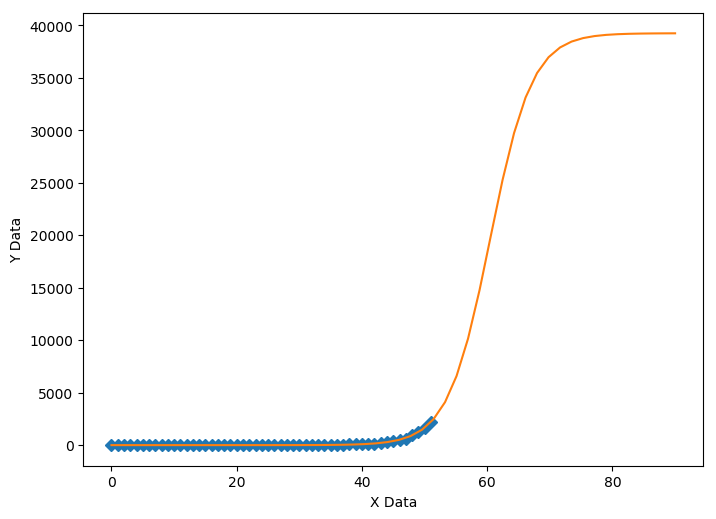

In [285]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot    
    yModel = sigmoid(xModel, *popt)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

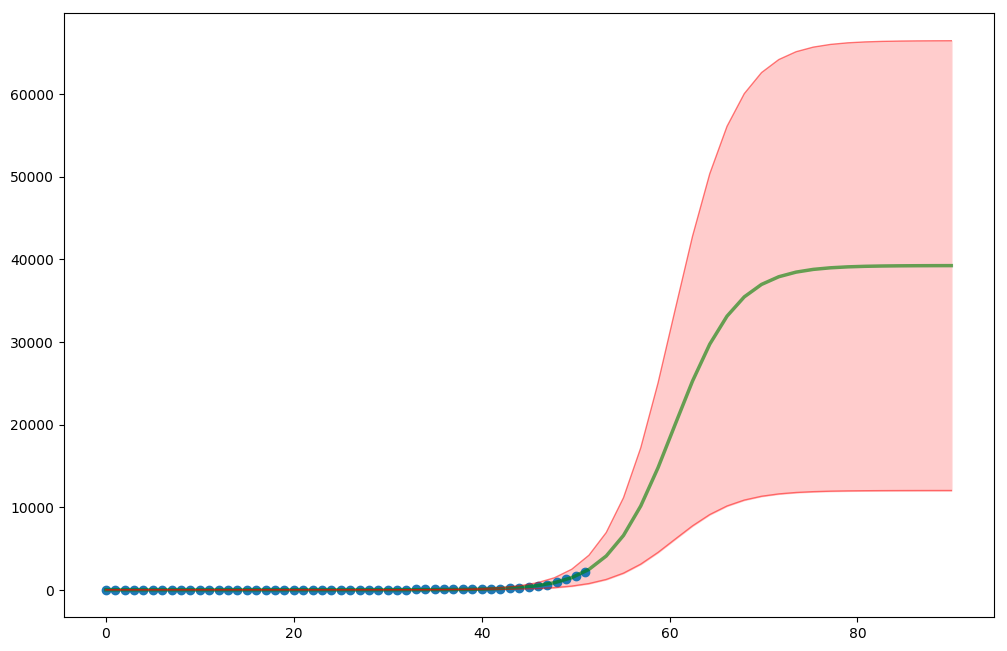

In [287]:
# Plot the best fit sigmoid and uncertainty region.

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
curveFit = sigmoid(xData,*popt)
curveFitModel = sigmoid(xModel,*popt)
plt.plot(xData, yData, 'o')
plt.hold(True)
plt.plot(xModel, curveFitModel, 
    linewidth=2.5, 
    color = 'green',
    alpha = 0.6) #,
    #label = fitEquation)

maxes = None
mins = None

for p in [ [0,eps,0], [eps,0,0], [0,0,eps]]:
    params = popt+L.dot(p)
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    if maxes is None:
        maxes = s
    if mins is None:
        mins =s
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)
    #print(maxes,mins)
    params = popt-L.dot(p)
    params[0] = max(params[0],max(yData))   # fudge in case the amplitude is negative. 
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)

plt.plot(xModel, maxes, linewidth= 1.0, alpha = 0.5, color='red')
plt.plot(xModel, mins, linewidth= 1.0, alpha = 0.5, color='red')
    
plt.fill_between(xModel, mins, maxes, color='#FFcccc')
    
#ax.set_yscale('log')
#plt.plot(xModel, sigmoid(xModel,lower[0], lower[1], lower[2] ), #curveFitModel-fitError, 
#    linewidth = 1.0, 
#    alpha = 0.5, 
#    color = 'red')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
#plt.text(3.2, 1.0, 
#    ("$\mathrm{curve fit\;\;values:\;}$\n a = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f \n c = %.3f\t $\pm$ %.3f" 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
#xlabel(r'\textrm{time (s)}', fontsize=24)
#ylabel(r'\textrm{temperature (K)}',fontsize=24)
#plt.title(r"Exponential fit with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
#      fontsize=28, color='k')
#ax.legend(fontsize=18)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.savefig('3sigmaPlot.pdf', figsize=(6,4), dpi=600)
#plt.show()

In [ ]:
#scratch. Ignore.
#values = np.array([
#    sigmoid(xModel, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
#    sigmoid(xModel, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),   
#    sigmoid(xModel, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
#    sigmoid(xModel, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]), 
#    sigmoid(xModel, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
#    sigmoid(xModel, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),
#    sigmoid(xModel, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
#    sigmoid(xModel, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]) 
#    ])

#print values
#print values[ : ,0]
# the fit error represents the standard deviation of all the possible fit +- uncertainty
# values at each x position. One could imagine getting the min and max possible deviations,
# but this is a one-line command that is pretty sweetly simple and fast.
#print fitError
#fitError = np.std(values, axis=0)
#nSigma = 1

# not sure this is kosher but it will give us sigmoids for the upper and lower
#upper, _ = curve_fit(sigmoid, xModel, curveFitModel+nSigma*fitError, geneticParameters)
#lower, _ = curve_fit(sigmoid, xModel, curveFitModel-nSigma*fitError, geneticParameters)
#rc('text', usetex=True)
#rc('font', family='serif')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
#matplotlib.rcParams['xtick.major.pad'] = 10
#matplotlib.rcParams['ytick.major.pad'] = 10


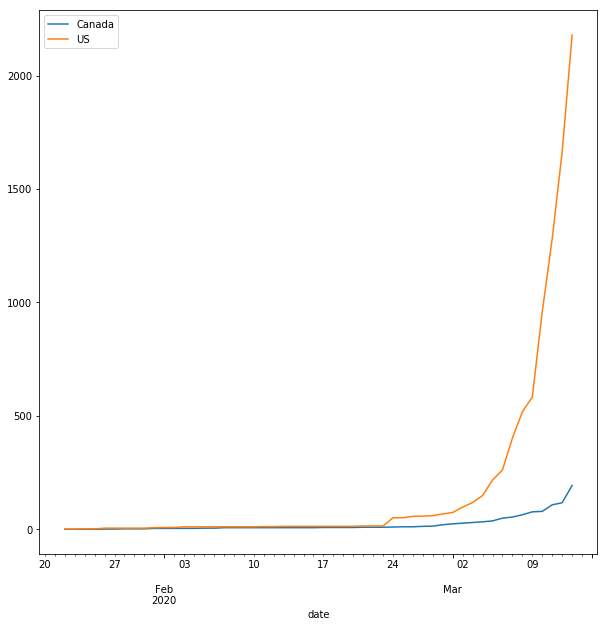

In [275]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(legend=True) #list(df.columns))
